In [1]:
from common import DenseGraph

In [2]:
class SsspContext:
    
    MAX_DISTANCE = 99999999999999999
    
    def __init__(self, g):
        self.pred = {} # 前驱结点
        self.distance ={} # 距离
        self.visited = {}
        
        for k in range(g.N):
            v = g.V[k][k]
            if v is None:
                continue
                
            self.pred[v.v] = -1        
            self.distance[v.v] = self.MAX_DISTANCE        
            self.visited[v.v] = False       
        
    def __str__(self):
        s = '{\n'
        s += '    pred = %s\n' % str(self.pred)
        s += '    distance = %s\n' % str(self.distance)
        s += '    visited = %s\n' % str(self.visited)
        s += '}\n'
        
        return s

    
class SsspGraph(DenseGraph):
    
    def __init__(self, maxNodeNum):
        super(SsspGraph, self).__init__(maxNodeNum)
        
    def singleSourceShortest(self, s):
        s = self.findV(s)
        if s is None:
            return None
        
        context = SsspContext(self)        
        context.distance[s.v] = 0
        
        while True:            
            # determine u whose dist[u] is smallest of unvisited vertices
            shortest = context.MAX_DISTANCE
            u = None
            
            for x in range(self.N):
                v = self.V[x][x]                
                
                if v is None:
                    continue
                    
                if not context.visited[v.v] and  context.distance[v.v] < shortest:
                    shortest = context.distance[v.v]
                    u = v
            
            if u is None:
                break
            
            context.visited[u.v] = True
            
            for x in range(self.N):
                v = self.V[u.v][x]
                if x != u.v and v is not None:
                    w = v.weight
                    newLen = context.distance[u.v] + w
                    if newLen < context.distance[v.v]:
                        context.distance[v.v] = newLen
                        context.pred[v.v] = u.v
            
        return context

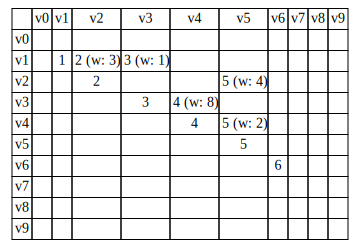

In [3]:
g = SsspGraph(10)
g.addV(1)
g.addV(2)
g.addV(3)
g.addV(4)
g.addV(5)
g.addV(6)

g.addE(1, 2, 3)
g.addE(1, 3, 1)
g.addE(3, 4, 8)
g.addE(4, 5, 2)
g.addE(2, 5, 4)

g.draw(True, True)

In [4]:
s = 1
context = g.singleSourceShortest(s)
print ('the shortest path from ' + str(s) + " is:")
print (context)

the shortest path from 1 is:
{
    pred = {1: -1, 2: 1, 3: 1, 4: 3, 5: 2, 6: -1}
    distance = {1: 0, 2: 3, 3: 1, 4: 9, 5: 7, 6: 99999999999999999}
    visited = {1: True, 2: True, 3: True, 4: True, 5: True, 6: False}
}

